In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv("Desktop/Projects/Mart-interview/OKmarts-summary.csv", header = 1, delimiter = ',')
df.iloc[:, :]

,年,月,UV,注册页访问用户数量,注册用户量,询盘量,报价量,线上生成订单量,线上成单量,线上退单量,...,总退单率,成交量同比增长率,成交量环比增长率,GMV同比增长,GMV环比增长,客单价,客单价同比增长率,客单价环比比增长率,ROI(投资回报率）,备注
0,2020,1,12435,/,/,92,54,/,/,/,...,=L3/K3,/,/,/,/,=M3/K3,/,/,/,NaN
1,NaN,2,14159,/,/,243,159,/,/,/,...,=L4/K4,/,=(K4-K3)/K3,/,=(M4-M3)/M3,=M4/K4,/,=(AJ4-AJ3)/AJ3,/,NaN
2,NaN,3,19089,/,/,194,149,/,/,/,...,=L5/K5,/,=(K5-K4)/K4,/,=(M5-M4)/M4,=M5/K5,/,=(AJ5-AJ4)/AJ4,/,NaN
3,NaN,1~3,=SUM(C3:C5),=SUM(D3:D5),=SUM(E3:E5),=SUM(F3:F5),=SUM(G3:G5),=SUM(H3:H5),11,1,...,=L6/K6,/,/,/,/,=M6/K6,/,/,/,NaN
4,NaN,4,16988,/,/,154,124,/,/,/,...,=L7/K7,/,=(K7-K5)/K5,/,=(M7-M5)/M5,=M7/K7,/,=(AJ5-AJ7)/AJ5,/,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,10~12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2023年,总计1~6,"=SUM(C57:C59,C61:C63,C65:C67,C69:C71)","=SUM(D57:D59,D61:D63,D65:D67,D69:D71)","=SUM(E57:E59,E61:E63,E65:E67,E69:E71)","=SUM(F57:F59,F61:F63,F65:F67,F69:F71)","=SUM(G57:G59,G61:G63,G65:G67,G69:G71)","=SUM(H57:H59,H61:H63,H65:H67,H69:H71)","=SUM(I57:I59,I61:I63,I65:I67,I69:I71)","=SUM(J57:J59,J61:J63,J65:J67,J69:J71)",...,=L73/K73,=(K73-K55)/K55,-,=(M73-M42-M46)/(M46+M42),-,=M73/K73,=(AJ73-AJ55)/AJ55,-,-,NaN
71,2023年,月均值1~6,"=AVERAGE(C57:C59,C61:C63,C65:C67,C69:C71)","=AVERAGE(D57:D59,D61:D63,D65:D67,D69:D71)","=AVERAGE(E57:E59,E61:E63,E65:E67,E69:E71)","=AVERAGE(F57:F59,F61:F63,F65:F67,F69:F71)","=AVERAGE(G57:G59,G61:G63,G65:G67,G69:G71)","=AVERAGE(H57:H59,H61:H63,H65:H67,H69:H71)","=AVERAGE(I57:I59,I61:I63,I65:I67,I69:I71)",-,...,-,"=AVERAGE(AF57:AF59,AF61:AF63,AF65:AF67,AF69:AF71)","=AVERAGE(AG57:AG59,AG61:AG63,AG65:AG67,AG69:AG71)",-,-,"=AVERAGE(AJ57:AJ59,AJ61:AJ63,AJ65:AJ67,AJ69:AJ71)",-,-,-,NaN


In [3]:
# fill missing data
df['年'] = df['年'].fillna(method = 'bfill')
df = df.fillna(0)
df = df.replace('/', 0).replace('年', '', regex=True)

In [4]:
# split data by year
df_2020 = df.iloc[:15,:15].drop(3).drop(7).drop(11)
df_2021 = df.iloc[18:33,:15].reset_index().iloc[:, 1:].drop(3).drop(7).drop(11).reset_index().iloc[:, 1:]
df_2022 = df.iloc[36:51,:15].reset_index().iloc[:, 1:].drop(3).drop(7).drop(11).reset_index().iloc[:, 1:]
df_2023 = df.iloc[54:69,:15].reset_index().iloc[:, 1:].drop(3).drop(7).drop(11).reset_index().iloc[:, 1:]
df_2023.head(20)

,年,月,UV,注册页访问用户数量,注册用户量,询盘量,报价量,线上生成订单量,线上成单量,线上退单量,总成交量,退单量,总成交金额GMV($）,投资成本,投资收益
0,2023,1,63568,230,130,195,158,108,37,11,71,13,120784.04,0,0
1,2023,2,63489,226,154,233,189,66,22,4,92,6,154937.25,0,0
2,2023,3,71917,247,190,250,209,95,23,5,85,6,165573.2,0,0
3,2023,4,66207,238,201,209,167,115,31,11,82,11,187322.92,0,0
4,2023,5,76222,231,219,210,176,95,27,5,83,5,217850.72,0,0
5,2023,6,80315,341,241,183,145,140,52,19,116,19,133468.66,0,0
6,2023,7,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2023,8,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2023,9,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2023,10,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# clean data type
df_2020['清月'] = df_2020['月'].astype(int)
df_2021['清月'] = df_2021['月'].astype(int).add(12*1)
df_2022['清月'] = df_2022['月'].astype(int).add(12*2)
df_2023['清月'] = df_2023['月'].astype(int).add(12*3)

In [6]:
# Excel function convert formular
def UV同比增长率(df, mon):
    print(str(mon)+'月较2023年'+str(mon-1)+'月同比增长'+str(round((int(df_2023['UV'][mon+1]) - int(df_2023['UV'][mon]))/int(df_2023['UV'][mon+1])*100, 4))+'%')

def aggregate_sum(df, row_num, col_name):
    df.at[row_num, col_name] = sum([int(i) for i in df.iloc[row_num -3:row_num,:][col_name].tolist()])

def total_sum(df, col_name):
    df.at[row_num, col_name]

In [7]:
month = 4
mon = month - 1
UV同比增长率(df_2023, mon)

3月较2023年2月同比增长13.1393%


In [8]:
col_names = ['UV', '注册页访问用户数量', '注册用户量', '询盘量', '报价量', '线上生成订单量']

In [9]:
df_concat = pd.concat([df_2020, df_2021, df_2022, df_2023], axis=0).reset_index().drop(columns='index')
df_concat['年'] = df_concat['年'].astype(int)
df_concat.head(50)

,年,月,UV,注册页访问用户数量,注册用户量,询盘量,报价量,线上生成订单量,线上成单量,线上退单量,总成交量,退单量,总成交金额GMV($）,投资成本,投资收益,清月
0,2020,1,12435,0,0,92,54,0,0,0,4,0,3259.98,0,0,1
1,2020,2,14159,0,0,243,159,0,0,0,17,0,14032.3,0,0,2
2,2020,3,19089,0,0,194,149,0,0,0,11,1,9140.9,0,0,3
3,2020,4,16988,0,0,154,124,0,0,0,11,0,17202.42,0,0,4
4,2020,5,17417,0,0,164,123,0,0,0,20,3,22837.12,0,0,5
5,2020,6,18992,0,0,234,173,0,0,0,13,1,8279.77,0,0,6
6,2020,7,31426,0,16,331,267,0,0,0,19,1,22908.32,0,0,7
7,2020,8,30422,0,21,291,231,0,0,0,30,5,24179.55,0,0,8
8,2020,9,30506,0,40,235,183,0,0,0,26,1,27374.52,0,0,9
9,2020,10,24092,0,28,212,175,0,0,0,24,3,46664.76,0,0,10


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# input data
x = np.array([int(i) for i in df_concat['清月'][:41]]).reshape(-1, 1)
y = np.array([float(i) for i in df_concat['UV'][:41]]).reshape(-1, 1)
y

array([[12435.],
       [14159.],
       [19089.],
       [16988.],
       [17417.],
       [18992.],
       [31426.],
       [30422.],
       [30506.],
       [24092.],
       [20164.],
       [18519.],
       [25476.],
       [22048.],
       [29661.],
       [35120.],
       [36786.],
       [49982.],
       [54747.],
       [58413.],
       [56919.],
       [56845.],
       [61431.],
       [58029.],
       [60804.],
       [63500.],
       [76288.],
       [74344.],
       [83791.],
       [91372.],
       [85583.],
       [91681.],
       [79278.],
       [70475.],
       [70498.],
       [64283.],
       [63568.],
       [63489.],
       [71917.],
       [66207.],
       [76222.]])

In [11]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
x_new = np.array([int(i) for i in df_concat['清月'][41:]])
y_new = model.predict(x_new[:, np.newaxis])
print('预测缺失值：', y_new)

预测缺失值： [[88559.56728674]
 [90408.84204793]
 [92258.11680912]
 [94107.3915703 ]
 [95956.66633149]
 [97805.94109268]
 [99655.21585386]]


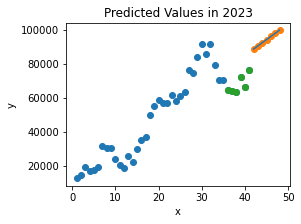

In [13]:
# plot results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.scatter(x_new, y_new)
ax.scatter(x[-6:], y[-6:]) #绿色上半年
ax.plot(x_new, y_new) #橘色预测下半年

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title('Predicted Values in 2023')
plt.show()

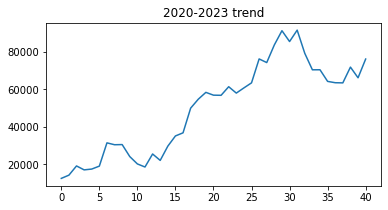

In [14]:
# TS Univariate
fig, axes = plt.subplots(1, 1, sharex=True)
df_ts = df_concat.UV[:41]
X = np.arange(0, 41, 1) 
Y1 = np.array([int(i) for i in df_ts])
fig.set_figheight(3)
fig.set_figheight(3)
plt.plot(X, Y1) 
plt.title("2020-2023 trend") 
plt.show() 

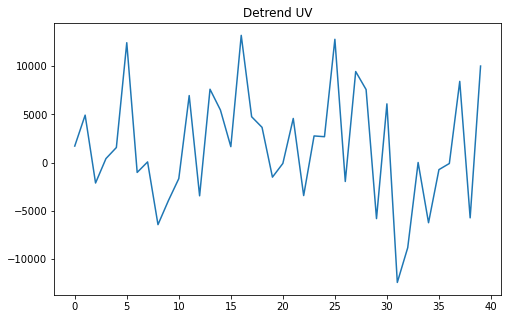

In [15]:
# Stationary: mean & variance constant over time at d = 1
# Detrend: value(t) = observation(t) - observation(t-1)

def parser(x):
 return datetime.strptime('202'+x, '%Y-%m')
 
X = np.array([float(i) for i in df_ts])

diff = list()
for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 diff.append(value)
plt.rcParams.update({'figure.figsize': (8,5)})

plt.plot(diff)
plt.title('Detrend UV')
plt.show()

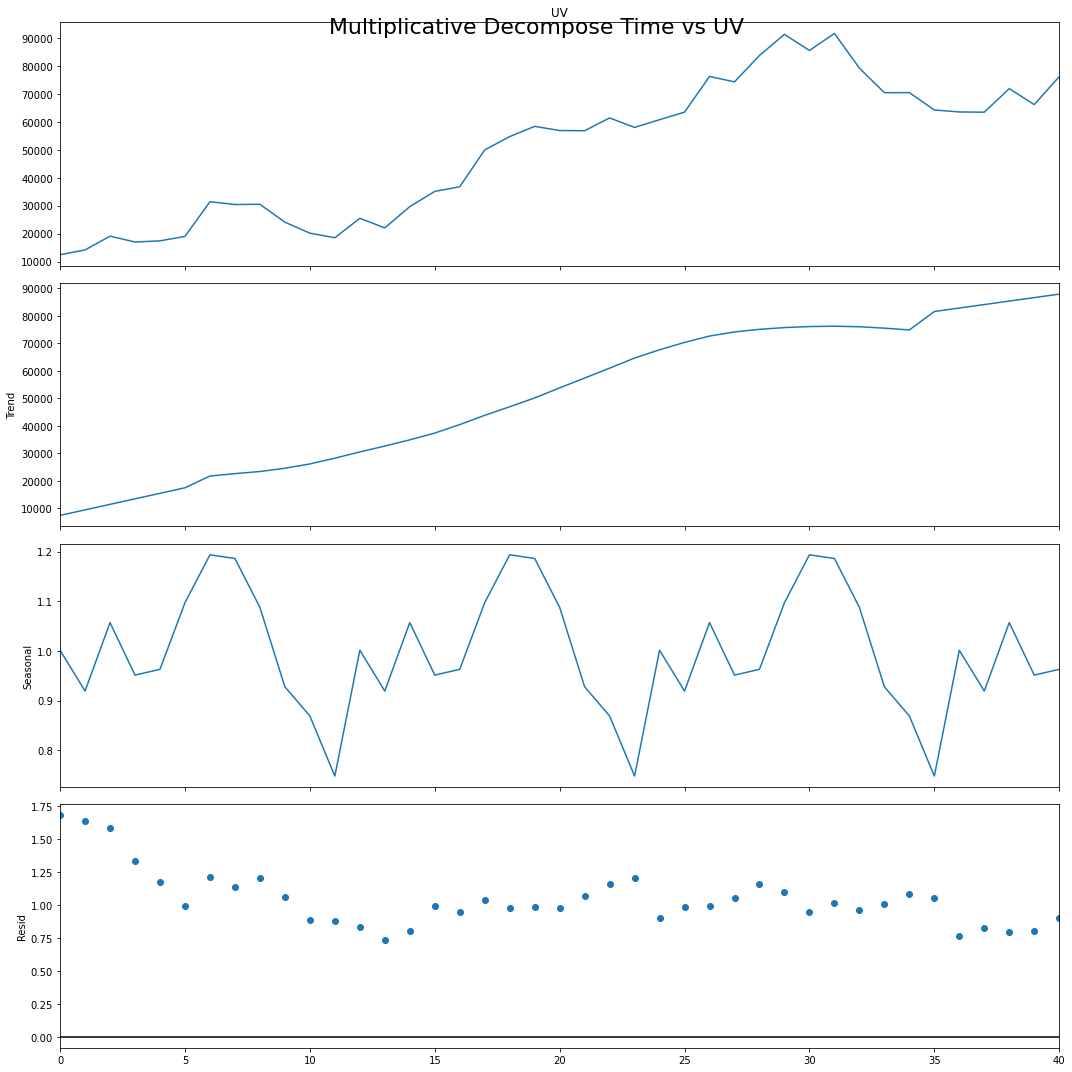

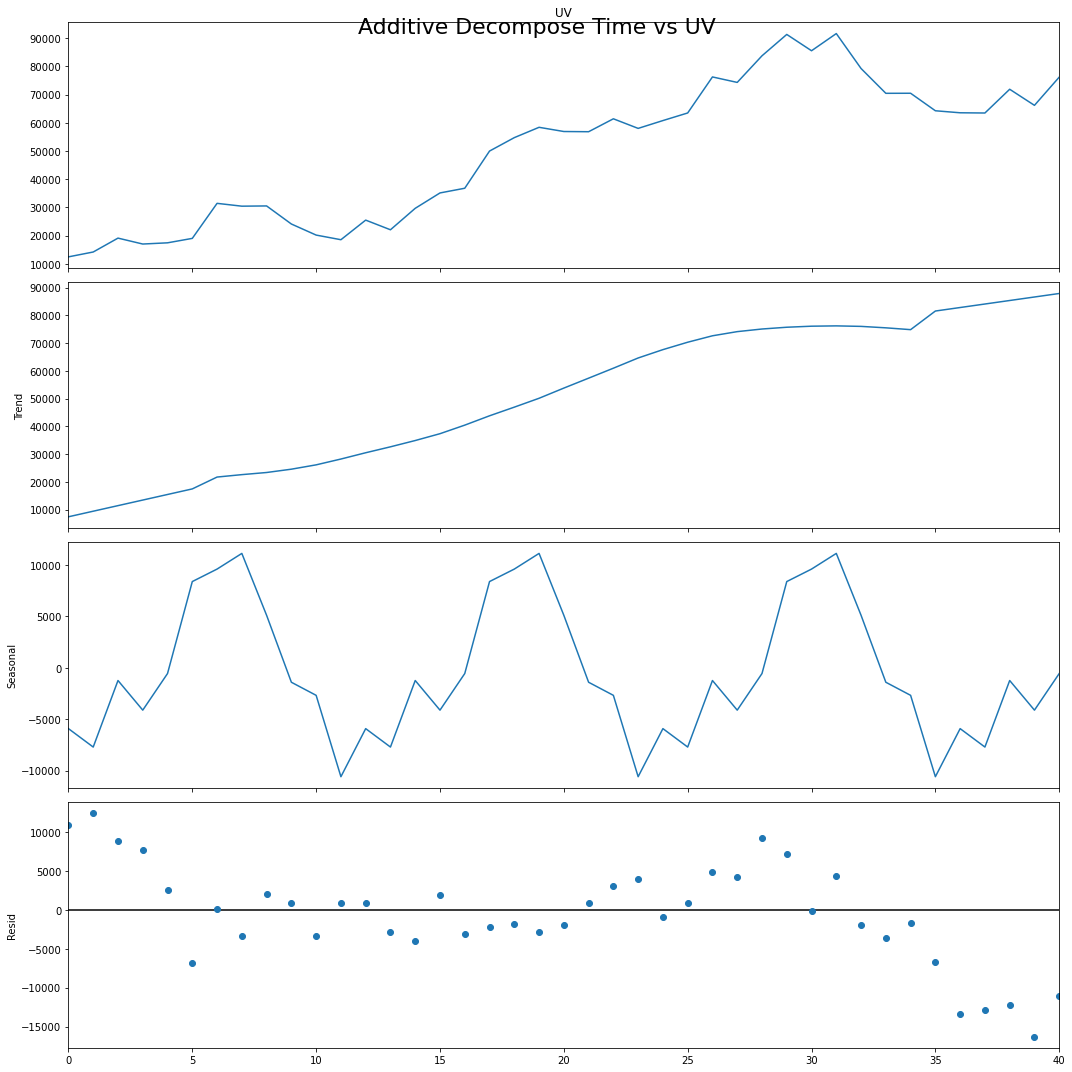

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
#  base level, trend, seasonal index and the residual
result_mul = seasonal_decompose(df_ts,  model = 'multiplicable', extrapolate_trend='freq', period = 12)
result_add = seasonal_decompose(df_ts, model='additive', extrapolate_trend='freq', period = 12)


plt.rcParams.update({'figure.figsize': (15,15)})
result_mul.plot().suptitle('Multiplicative Decompose Time vs UV', fontsize=22)
result_add.plot().suptitle('Additive Decompose Time vs UV', fontsize=22)
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df_ts.dropna())
print('ADF Statistic: %f' % result[0]) # stationary test: Augmented Dickey-Fuller. The more negative the stronger the rejection of the hypothesis that there is a unit root （unit root: non-stationary）.
print('p-value: %f' % result[1]) # p-value > 0.05 we go ahead with finding the order of differencing

ADF Statistic: -1.315017
p-value: 0.622274


In [18]:
# convert UV type and get stationary data
df_ts = pd.DataFrame(df_ts)
df_ts['UV'] = df_ts['UV'].astype(float)

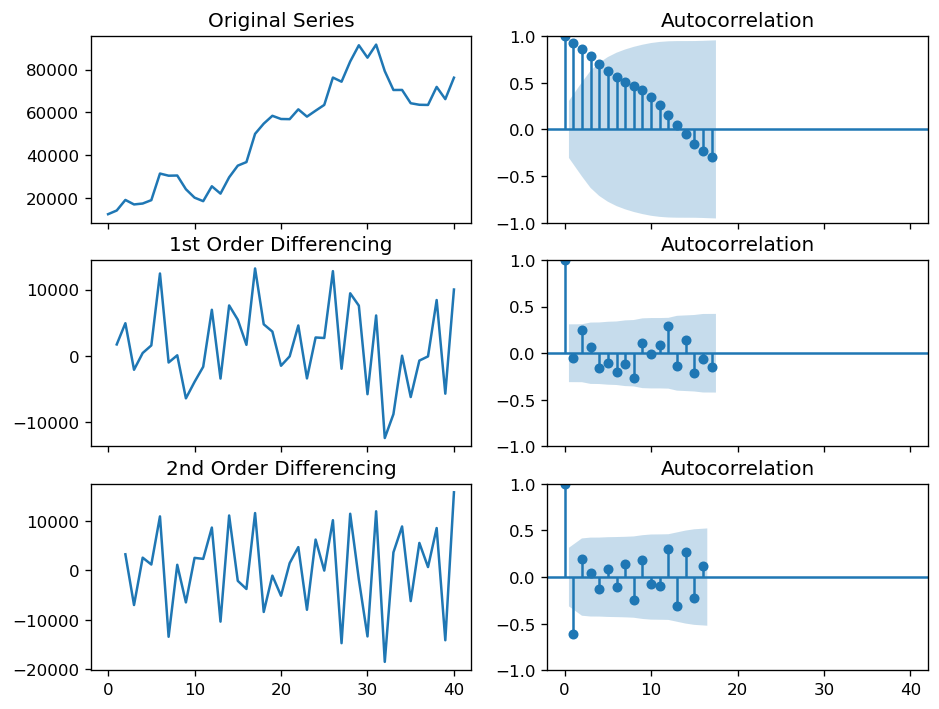

In [19]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_ts); axes[0, 0].set_title('Original Series')
plot_acf(df_ts, ax=axes[0, 1])


# 1st Differencing
# reaches stationarity with one order of differencing
axes[1, 0].plot(df_ts.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_ts.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
# the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.
axes[2, 0].plot(df_ts.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_ts.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [20]:
import pmdarima
from pmdarima.arima.utils import ndiffs
y = df_ts.UV

## Adf Stationary Test: non-station with ADF statistics = 2
print('adf', ndiffs(y, test='adf'))

# KPSS test: reject null hypothesis that it's stationary
print('kpss', ndiffs(y, test='kpss')) 

# PP test: non parametric, it just need the residual to be stationary at diff = 1
print('pp', ndiffs(y, test='pp')) 

print('the data is non-stationary')

adf 2
kpss 1
pp 1
the data is non-stationary


In [21]:
# get stationary data
# df_ts_stationary = df_ts.diff()

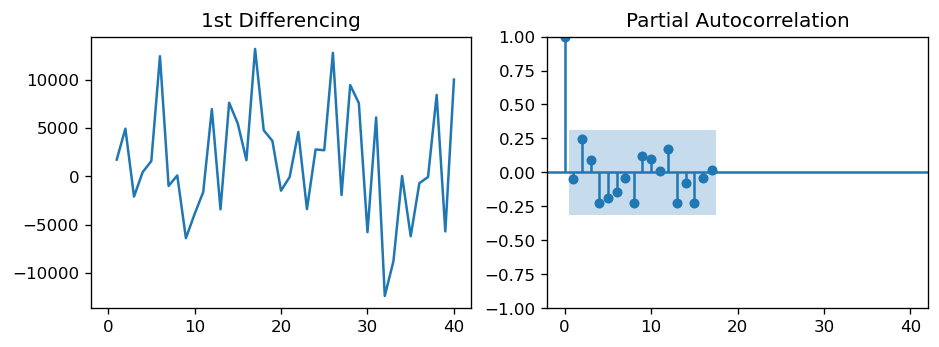

In [22]:
# AR = 0
# add up when under differenced
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_ts.UV.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_ts.UV.diff().dropna(), ax=axes[1])

plt.show()

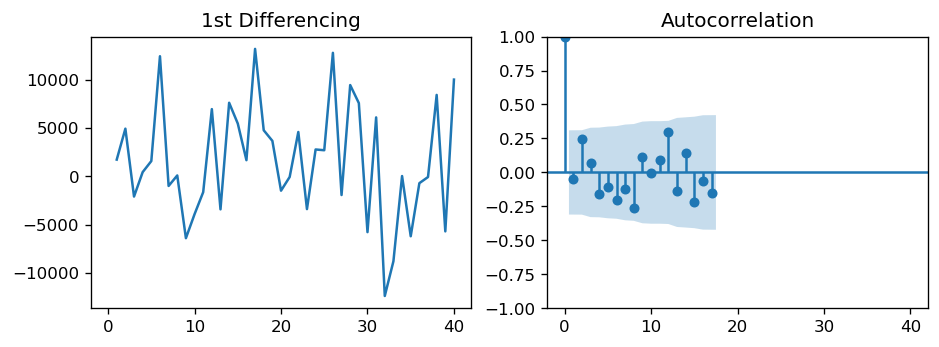

In [23]:
# MA = 0
# add up when over differenced
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_ts.UV.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_ts.UV.diff().dropna(), ax=axes[1])

plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# p=1,d=1,q=1 ARIMA Model
model = ARIMA(df_ts.UV, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
# ‘coef’ are the weights of the respective terms.
# ma not close to 0 and p-value highly significant, AIC is low which are good.

                               SARIMAX Results                                
Dep. Variable:                     UV   No. Observations:                   41
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -405.376
Date:                Thu, 15 Feb 2024   AIC                            816.752
Time:                        11:27:10   BIC                            821.819
Sample:                             0   HQIC                           818.584
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7139      0.668      1.068      0.285      -0.596       2.024
ma.L1         -0.6040      0.804     -0.751      0.453      -2.180       0.972
sigma2      4.075e+07   6.96e-09   5.85e+15      0.0

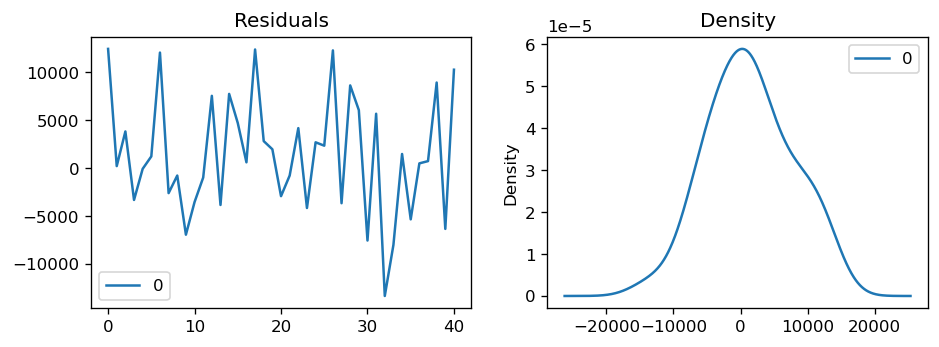

In [25]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

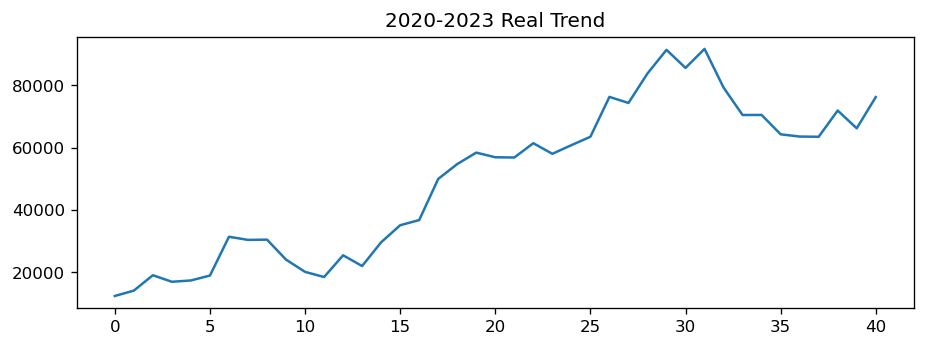

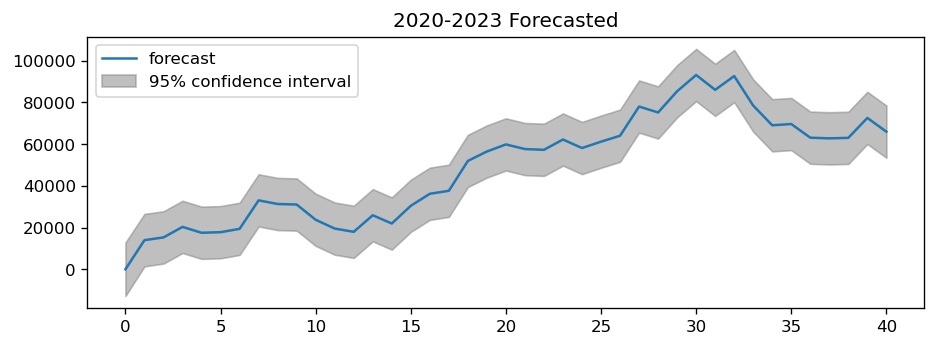

In [26]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(1,1)


df_ts = df_concat.UV[:41]
X = np.arange(0, 41, 1) 
Y1 = np.array([int(i) for i in df_ts])
fig.set_figheight(8)
fig.set_figheight(3)
plt.plot(X, Y1) 
plt.title("2020-2023 Real Trend") 
# plt.show() 

plot_predict(model_fit, dynamic=False)
plt.title('2020-2023 Forecasted')

plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -521.763
Date:                Thu, 15 Feb 2024   AIC                           1049.525
Time:                        11:27:10   BIC                           1055.076
Sample:                             0   HQIC                          1051.614
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0658      0.354      0.186      0.853      -0.628       0.760
ma.L1         -0.5697      0.341     -1.670      0.095      -1.238       0.099
sigma2      2.804e+08   2.54e-09    1.1e+17      0.0

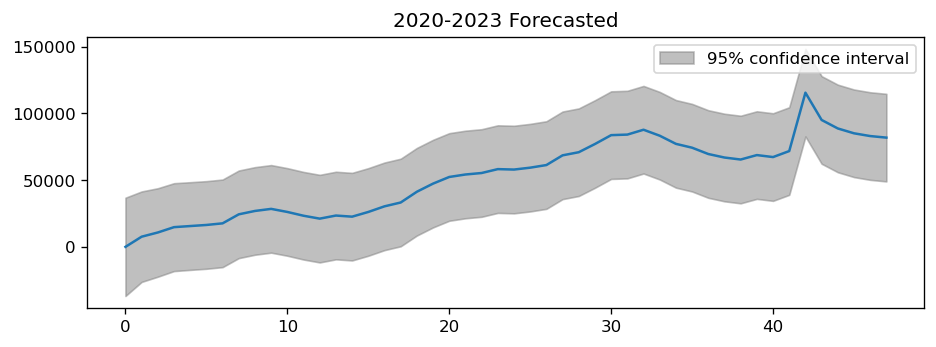

In [27]:
# p=1,d=1,q=1 ARIMA Model
# prediction  = last day value + model prediction
model = ARIMA(np.asarray([int(i) for i in df_concat.UV[:41].dropna()] + [int(i)+int(df_concat.UV[41]) for i in df_concat.UV[41:]]), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

plot_predict(model_fit, dynamic=False)
plt.title('2020-2023 Forecasted')

plt.show()